## 4.1 회귀분석 예제

특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis) 문제라고 한다. 이 절에서는 회귀분석의 몇가지 예를 들어본다.

### 당뇨병 진행도 예측

scikit-learn 패키지가 제공하는  당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

다음과 같은 10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.

* age: 나이
* sex: 성별
* bmi: BMI(Body mass index)지수
* bp: 평균혈압
* s1~s6: 6종류의 혈액검사수치

종속변수는 1년 뒤 측정한 당뇨병의 진행률이다.

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


스케터플롯을 그려보면 독립변수인 BMI지수와 평균혈압이 종속변수인  당뇨병 진행도와 양의 상관관계를 가지는 것을 볼 수 있다. 또한 두 독립변수 BMI지수와 평균혈압도 서로 양의 상관관계를 가진다. 이렇게 독립변수끼리 상관관계를 가지는 것을 다중공선성(multicolinearity)이라고 한다. 다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다.

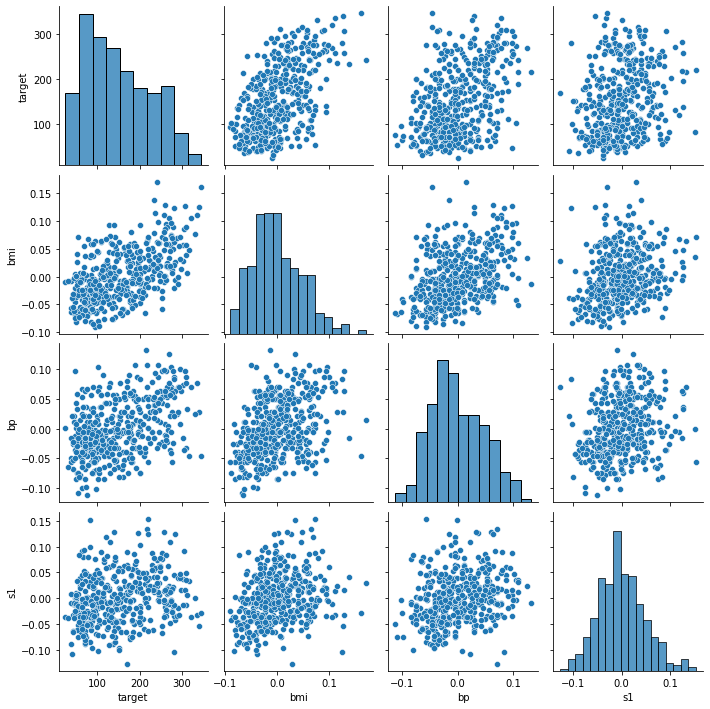

In [3]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
X, y = df.drop('target', axis=1), df['target']
X.shape, y.shape

((442, 10), (442,))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5035516013553434